# Industry Seminar | Alzheimer's Disease Detection using DARWIN Dataset - Binary Classification

**Team No:** 5

**Members:**
- S. Vijay Krishna Sundaran - RA2111026040042
- Rashad Mohammed - RA2111026040027
- Amivarsha Balaji - RA2111026040049

# Dataset Description :
The DARWIN dataset contains handwriting data which is composed of 25 handwriting tasks. The dataset was specifically designed for the early detection of Alzheimer’s disease (AD). The dataset includes data from 174 participants (89 AD patients and 85 healthy people).
The file “DARWIN.csv” contains the acquired data. The file consists of one row for each participant plus an additional header row. The first row is the header row, the next 89 rows collect patients data, whereas the remaining 84 rows collect information from healthy people.
The file consists of 452 columns. The first column shows participants' identifiers, whereas the last column shows the class to which each participant belongs.  This value can be equal to  'P' (Patient) or 'H' (Healthy).
The remaining columns report the features extracted from a specific task. The tasks performed are 25, and for each task 18 features have been extracted. The column will be identified by the name of the features followed by a numeric identifier representing the task the feature is extracted. E.g., the column with the header "total_time8" collects the values for the "total time" feature extracted.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# Importing Dataset

In [2]:
darwin=pd.read_csv('DARWIN.csv') #Reads and imports the dataset

# Data Overview

In [3]:
darwin.shape #Prints the dimensions of the dataset

(174, 452)

In [4]:
darwin.head() #Prints the first five rows of the dataset

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [5]:
darwin.tail() #Prints the last five rows of the dataset

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
173,id_174,2875,0.000008,235.769350,178.208024,1838,6560,0.567311,0.147818,206.988687,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


In [6]:
darwin.info() #Prints the number of dimensions, various datatypes, and the memory usage in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [7]:
darwin.dtypes #Prints the datatype of each column in the dataset

ID                  object
air_time1            int64
disp_index1        float64
gmrt_in_air1       float64
gmrt_on_paper1     float64
                    ...   
paper_time25         int64
pressure_mean25    float64
pressure_var25     float64
total_time25         int64
class               object
Length: 452, dtype: object

# Summary Statistics

In [8]:
darwin.describe() # Show the descriptive statistics 

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


# Class Distribution

Text(0, 0.5, 'Count')

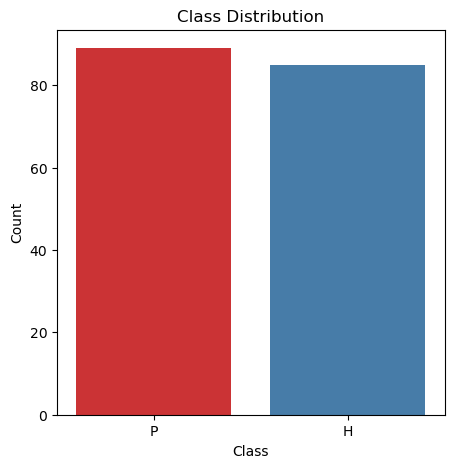

In [9]:
plt.figure(figsize=(5, 5))
sns.countplot(data=darwin, x='class', palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Error Handling

In [10]:
darwin.isnull().sum()

ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64

In [11]:
darwin.isna().sum()

ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64

In [12]:
def checkNull(value, my_list):
    if value in my_list:
        return True
    else:
        return False

if checkNull(1, darwin.isnull().sum()):
    print("Dataset contains Null value")
else:
    print("Dataset does not contain Null value")

Dataset does not contain Null value


In [13]:
def checkNaN(value, my_list):
    if value in my_list:
        return True
    else:
        return False

if checkNaN(1, darwin.isna().sum()):
    print("Dataset contains NaN value")
else:
    print("Dataset does not contain NaN value")

Dataset does not contain NaN value


In [14]:
dupe_rows = darwin[darwin.duplicated()]

if not dupe_rows.empty:
    print("Duplicate rows found:")
    print(dupe_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [15]:
string_columns = darwin.select_dtypes(include='object')

if not string_columns.empty:
    print("Columns with string values:")
    print(string_columns.columns)
else:
    print("No columns with string values found.")

Columns with string values:
Index(['ID', 'class'], dtype='object')


There are no missing values, no null values, no duplicate rows, no duplicate columns in the given dataset.

In [16]:
darwin.drop(["ID"], axis=1, inplace=True)

In [17]:
# Encode the target variable 'class' ('P' for Patient, 'H' for Healthy)
le = LabelEncoder()
darwin['class'] = le.fit_transform(darwin['class'])

# Feature Engineering

**Reduce High-dimensionality**

**Low Variance Filtering:**

In [18]:
# Calculate variance for each feature
variances = darwin.var(numeric_only=True)

# Set a threshold (experiment with different values)
threshold = 0.15

# Filter features with variance below the threshold
low_variance_features = variances[variances <= threshold].index

# Create a new DataFrame without low variance features
darwin_filtered = darwin.drop(columns=low_variance_features)

print("Original DataFrame:")
print(len(darwin.columns))
print("\nDataFrame after low variance filter:")
print(len(darwin_filtered.columns))

# Update the darwin DataFrame to the filtered version
darwin = darwin_filtered
darwin.shape

Original DataFrame:
451

DataFrame after low variance filter:
336


(174, 336)

In [19]:
print(darwin_filtered['class'])

0      1
1      1
2      1
3      1
4      1
      ..
169    0
170    0
171    0
172    0
173    0
Name: class, Length: 174, dtype: int64


**High Correlation Filtering**

In [20]:
# Calculate correlation matrix
correlation_matrix = darwin.corr()

# Set a correlation threshold (experiment with different values)
correlation_threshold = 0.80

# Identify highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) > correlation_threshold)

# Create a set to keep track of features to remove
features_to_remove = set()

# Loop through the pairs and decide which features to remove
for feature1, feature2 in zip(*highly_correlated_pairs):
    if feature1 != feature2 and feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Convert indices to column labels
columns_to_remove = [darwin.columns[idx] for idx in features_to_remove]

# Create a new DataFrame without highly correlated features
darwin_filtered = darwin.drop(columns=columns_to_remove)

print("Original DataFrame:")
print(len(darwin.columns))
print("\nDataFrame after removing highly correlated features:")
print(len(darwin_filtered.columns))
darwin_filtered.shape

Original DataFrame:
336

DataFrame after removing highly correlated features:
231


(174, 231)

In [21]:
print(darwin_filtered['class'])

0      1
1      1
2      1
3      1
4      1
      ..
169    0
170    0
171    0
172    0
173    0
Name: class, Length: 174, dtype: int64


# Principal Component Analysis(PCA)

# Seperate Features and Target

In [22]:
# Separate features and target (if applicable)
X = darwin_filtered.drop(['class'], axis=1)  # Replace 'target_column' with your target column name

# Save original column names
original_columns = X.columns

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
num_components = 0.80  # Retain 80% of explained variance
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(X_scaled)

# Create a new DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Map original column names to PC column names
pc_df.columns = [original_columns[i] for i in range(pca.n_components_)]


# Attach the target column back
pc_df['class'] = darwin_filtered['class']

# Display the principal components DataFrame
print(pc_df)
pc_df.shape

     air_time1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0     1.976732     -0.898343        0.095552         -3.426440   
1    13.896627     -2.081432        1.022226         -1.234792   
2     0.224172     -2.879834       -2.644696         -2.568218   
3     6.542050     -3.108996        1.011138         -0.710736   
4     1.627992     -5.792173       -0.220636         -2.416276   
..         ...           ...             ...               ...   
169  -2.457020      1.903059       -0.539439         -2.094110   
170  -1.501985      0.958347       -0.112847          0.730846   
171  -0.468021     -2.403468        2.476466         -0.530545   
172  -0.724729     -2.708894        1.951468         -0.230700   
173  -0.583345     -2.530533        2.202213         -0.454513   

     max_y_extension1  num_of_pendown1  paper_time1  pressure_mean1  \
0            1.630194        -6.955546    -1.771622        0.820078   
1            9.561154        -4.982059     8.193272       -3.1806

(174, 53)

**Therefore, the dimensions were reduced from originally (174, 452) to (174, 336) to (174, 231) and to finally (174, 53).**

In [23]:
X = pc_df.drop('class', axis=1)  # Features
y = pc_df['class']  # Target variable

# Split the data into train and test sets
test_size = 0.2  # Proportion of data to allocate to the test set
random_state = 6  # Seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# ALGORITHM ONE : XGBoost

**Train the XGBoost Model:**

In [24]:
!pip install xgboost

In [25]:
import xgboost as xgb


# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    max_depth=3,  # Maximum depth of trees
    learning_rate=0.1,  # Learning rate
    n_estimators=100  # Number of boosting rounds
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)


**Model Evaluation:**

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.79      0.88        19

    accuracy                           0.89        35
   macro avg       0.90      0.89      0.89        35
weighted avg       0.91      0.89      0.89        35



# ALGORITHM TWO : CATBOOSTCLASSIFIER

**Train the CatBoostClassifier Model:**

In [27]:
!pip install catboost

In [28]:
# Define and train the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=70,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    depth=3  # Maximum depth of trees
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

0:	learn: 0.6407874	total: 59.3ms	remaining: 4.09s
1:	learn: 0.5973161	total: 59.9ms	remaining: 2.04s
2:	learn: 0.5663787	total: 60.6ms	remaining: 1.35s
3:	learn: 0.5575601	total: 61.2ms	remaining: 1.01s
4:	learn: 0.5185734	total: 61.9ms	remaining: 805ms
5:	learn: 0.4921407	total: 62.4ms	remaining: 666ms
6:	learn: 0.4665071	total: 63ms	remaining: 567ms
7:	learn: 0.4515769	total: 63.7ms	remaining: 494ms
8:	learn: 0.4377416	total: 64.2ms	remaining: 435ms
9:	learn: 0.4264385	total: 64.8ms	remaining: 389ms
10:	learn: 0.4172183	total: 65.3ms	remaining: 350ms
11:	learn: 0.3964225	total: 65.9ms	remaining: 318ms
12:	learn: 0.3832411	total: 66.5ms	remaining: 292ms
13:	learn: 0.3649010	total: 67.1ms	remaining: 268ms
14:	learn: 0.3448955	total: 67.6ms	remaining: 248ms
15:	learn: 0.3382943	total: 68.1ms	remaining: 230ms
16:	learn: 0.3296449	total: 68.7ms	remaining: 214ms
17:	learn: 0.3217882	total: 69.5ms	remaining: 201ms
18:	learn: 0.3146301	total: 70ms	remaining: 188ms
19:	learn: 0.3023668	total

**Model Evaluation**

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9428571428571428
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.95      0.95        19

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

